In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

input_folder = '/kaggle/input/plantvillage-dataset/color'
output_folder = '/kaggle/working/plantvillage-dataset-split'

train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)

for class_name in os.listdir(input_folder):
    class_dir = os.path.join(input_folder, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=1337)
        val_images, test_images = train_test_split(temp_images, test_size=(1/3), random_state=1337) 
        
        create_dir(os.path.join(train_dir, class_name))
        create_dir(os.path.join(val_dir, class_name))
        create_dir(os.path.join(test_dir, class_name))
        
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))


In [3]:
train_path='/kaggle/working/plantvillage-dataset-split/train'

In [4]:
len(os.listdir(train_path))

38

In [5]:
all=0
data=os.listdir(train_path)
for d in data:
    all=all+len(os.listdir(train_path+'/'+d))

In [6]:
all

37998

In [7]:
all=0
data=os.listdir(train_path)
val_path='/kaggle/working/plantvillage-dataset-split/val'
for d in data:
    all=all+len(os.listdir(val_path+'/'+d))

In [8]:
all

10859

In [9]:
all=0
data=os.listdir(train_path)
test_path='/kaggle/working/plantvillage-dataset-split/test'
for d in data:
    all=all+len(os.listdir(test_path+'/'+d))

In [10]:
all

5448

In [11]:
cl=os.listdir(train_path)

In [12]:
cl

['Squash___Powdery_mildew',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Tomato___Target_Spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___healthy',
 'Peach___Bacterial_spot',
 'Grape___Esca_(Black_Measles)',
 'Peach___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Early_blight',
 'Apple___Black_rot',
 'Strawberry___healthy',
 'Tomato___Leaf_Mold',
 'Potato___Early_blight',
 'Tomato___Tomato_mosaic_virus',
 'Cherry_(including_sour)___Powdery_mildew',
 'Potato___healthy',
 'Potato___Late_blight',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Grape___Black_rot',
 'Apple___Apple_scab',
 'Apple___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn_(maize)___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Co

In [13]:
dim1=[]
dim2=[]
for x in cl:
    path=train_path+'/'+x
    im=os.listdir(path)
    for xx in im:
      img=imread(path+'/'+xx)     
      d1,d2,colors=img.shape
      dim1.append(d1)
      dim2.append(d2)

In [14]:
np.mean(dim1)

256.0

In [15]:
np.mean(dim2)

256.0

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-08-10 17:14:10.456953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 17:14:10.457095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 17:14:10.732467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
image_gen =ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [18]:
val_test_gen=ImageDataGenerator(rescale=1/255)

In [19]:
 path=train_path+'/Apple___Black_rot'

In [20]:
imgtest=imread(path+'/'+os.listdir(path)[0])

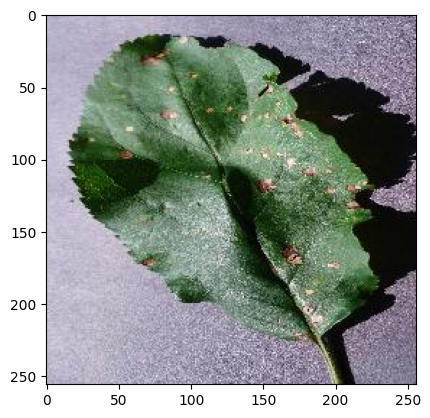

In [21]:
plt.imshow(imgtest)

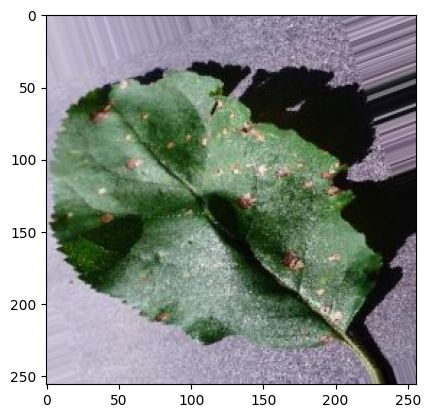

In [22]:
plt.imshow(image_gen.random_transform(imgtest))

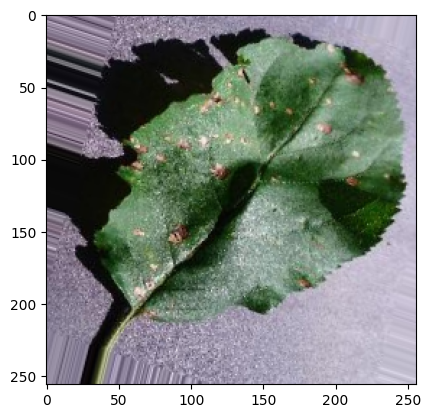

In [23]:
plt.imshow(image_gen.random_transform(imgtest))

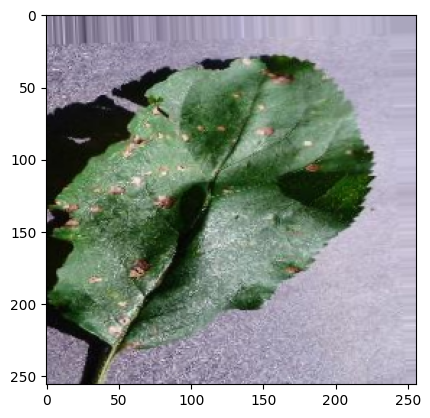

In [24]:
plt.imshow(image_gen.random_transform(imgtest))

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, InceptionResNetV2, DenseNet201, EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,MaxPool2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam

In [26]:
val_data_gen = val_test_gen.flow_from_directory(
    val_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

test_data_gen = val_test_gen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 10859 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


In [27]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                                color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical')

Found 37998 images belonging to 38 classes.


In [28]:
train_image_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [29]:
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_image_gen.classes),
    y=train_image_gen.classes
)

class_weights = dict(enumerate(class_weights))
class_weights

{0: 2.2674543501611173,
 1: 2.3040261945185545,
 2: 5.208059210526316,
 3: 0.8687640038410536,
 4: 0.9514247082978616,
 5: 1.3586241418764302,
 6: 1.6749537159481618,
 7: 2.7853687142647705,
 8: 1.1989776599772812,
 9: 1.4513024215109618,
 10: 1.229947562633521,
 11: 1.210590034408054,
 12: 1.0330034797738148,
 13: 1.3279513524847977,
 14: 3.3782005689900427,
 15: 0.259457023461612,
 16: 0.6222447843317067,
 17: 3.968045112781955,
 18: 1.4346447179642074,
 19: 0.9670670874478265,
 20: 1.4284962406015038,
 21: 1.4284962406015038,
 22: 9.433465739821251,
 23: 3.8608006502743346,
 24: 0.28064759147377283,
 25: 0.778775209050664,
 26: 1.2885919696147585,
 27: 3.134631248968817,
 28: 0.6720076400679117,
 29: 1.4284962406015038,
 30: 0.7484635991175543,
 31: 1.5014224751066856,
 32: 0.8070600229387027,
 33: 0.852470049804819,
 34: 1.01827634258763,
 35: 0.2667237579143912,
 36: 3.8312159709618876,
 37: 0.8984253085544048}

In [30]:
from tensorflow.keras import layers, models, applications
import tensorflow as tf

input_shape = (224, 224, 3)
base_model = applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(base_model.output)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(38, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 10,202,185 (38.92 MB)

 Trainable params: 10,159,394 (38.76 MB)

 Non-trainable params: 42,791 (167.16 KB)

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)
his=model.fit(
    train_image_gen,
    epochs=50,
    validation_data=val_data_gen,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1723310193.181443      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723310193.301896      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 770/1188 ━━━━━━━━━━━━━━━━━━━━ 3:03 440ms/step - accuracy: 0.4031 - loss: 4.9889

W0000 00:00:1723310531.818129      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.4744 - loss: 4.1425

W0000 00:00:1723310680.294073      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 630s 431ms/step - accuracy: 0.4745 - loss: 4.1410 - val_accuracy: 0.4249 - val_loss: 4.8934
Epoch 2/50


W0000 00:00:1723310704.437687      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 426s 357ms/step - accuracy: 0.8049 - loss: 1.2596 - val_accuracy: 0.8624 - val_loss: 1.0367
Epoch 3/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 424s 355ms/step - accuracy: 0.8812 - loss: 0.9263 - val_accuracy: 0.8958 - val_loss: 0.8585
Epoch 4/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 424s 355ms/step - accuracy: 0.9185 - loss: 0.7146 - val_accuracy: 0.8719 - val_loss: 1.1008
Epoch 5/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 427s 357ms/step - accuracy: 0.9212 - loss: 0.7457 - val_accuracy: 0.9196 - val_loss: 0.7437
Epoch 6/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 444s 372ms/step - accuracy: 0.9378 - loss: 0.6438 - val_accuracy: 0.8995 - val_loss: 0.8872
Epoch 7/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 433s 362ms/step - accuracy: 0.9375 - loss: 0.6310 - val_accuracy: 0.9532 - val_loss: 0.5456
Epoch 8/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 422s 353ms/step - accuracy: 0.9454 - loss: 0.5760 - val_accuracy: 0.9040 - val_loss: 0.8911
Epoch 9/50
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 427s 357ms/step - accuracy: 0.9

<Axes: >

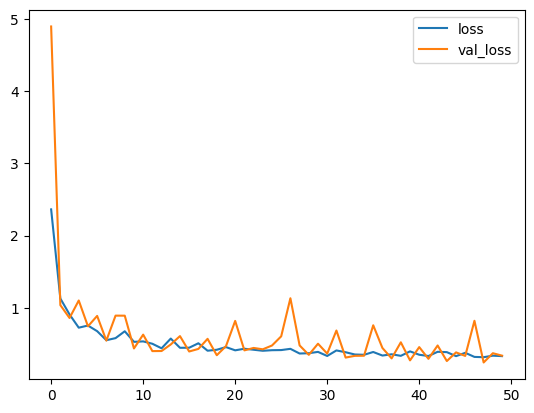

In [33]:
metric=pd.DataFrame(his.history)
metric[['loss','val_loss']].plot()

<Axes: >

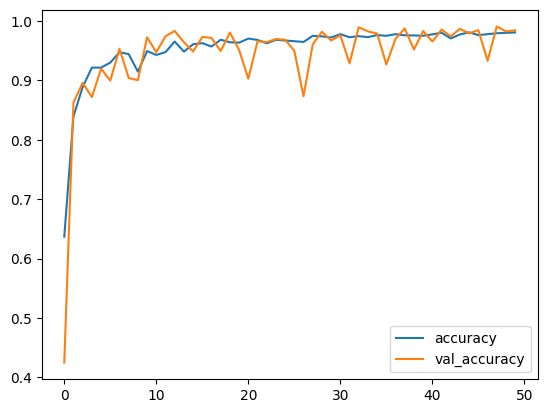

In [34]:
metric[['accuracy','val_accuracy']].plot()

In [35]:
#prediction=model.predict(test_data_gen)

In [36]:
#from sklearn.metrics import classification_report,confusion_matrix

In [37]:
#cm = confusion_matrix(test_data_gen.classes, prediction)

#plt.figure(figsize=(38, 38))

#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicted Class')
#plt.ylabel('True Class')
#plt.show()

In [38]:
#print(classification_report(test_data_gen.classes,prediction))

In [39]:
from tensorflow.keras.models import load_model
model.save('model.h5')

In [40]:
from tensorflow.keras.models import load_model
model.save('model.keras')